# HEART DISEASE PREDICTION SYSTEM

In [2]:
# Load Packages
import pandas as pd
import numpy as np

#Load Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv("heart_2020.csv")

In [4]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
data.shape

(319795, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
# checking if there are missing values in datset
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
# checking if the dataset has any duplicate values
data.duplicated().any()

True

In [9]:
# dropping the same values
data = data.drop_duplicates()

In [10]:
# checking data after dropping duplicates
data.shape

(301717, 18)

<function matplotlib.pyplot.show(close=None, block=None)>

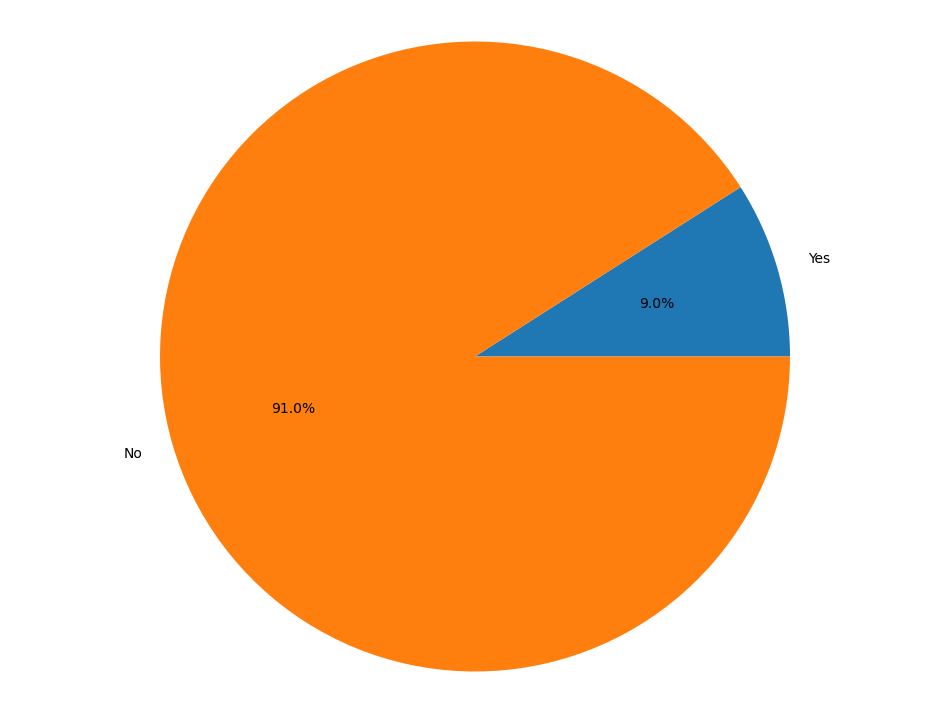

In [11]:
# Pie chart to show the distribution of the target variable
labels = 'Yes', 'No'
yes_count = (data['HeartDisease']=='Yes').sum()
no_count = (data['HeartDisease']=='No').sum()
sizes = [yes_count,no_count]
fig1, ax1 = plt.subplots(figsize=(12,9))
ax1.pie(sizes,labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show

In [12]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

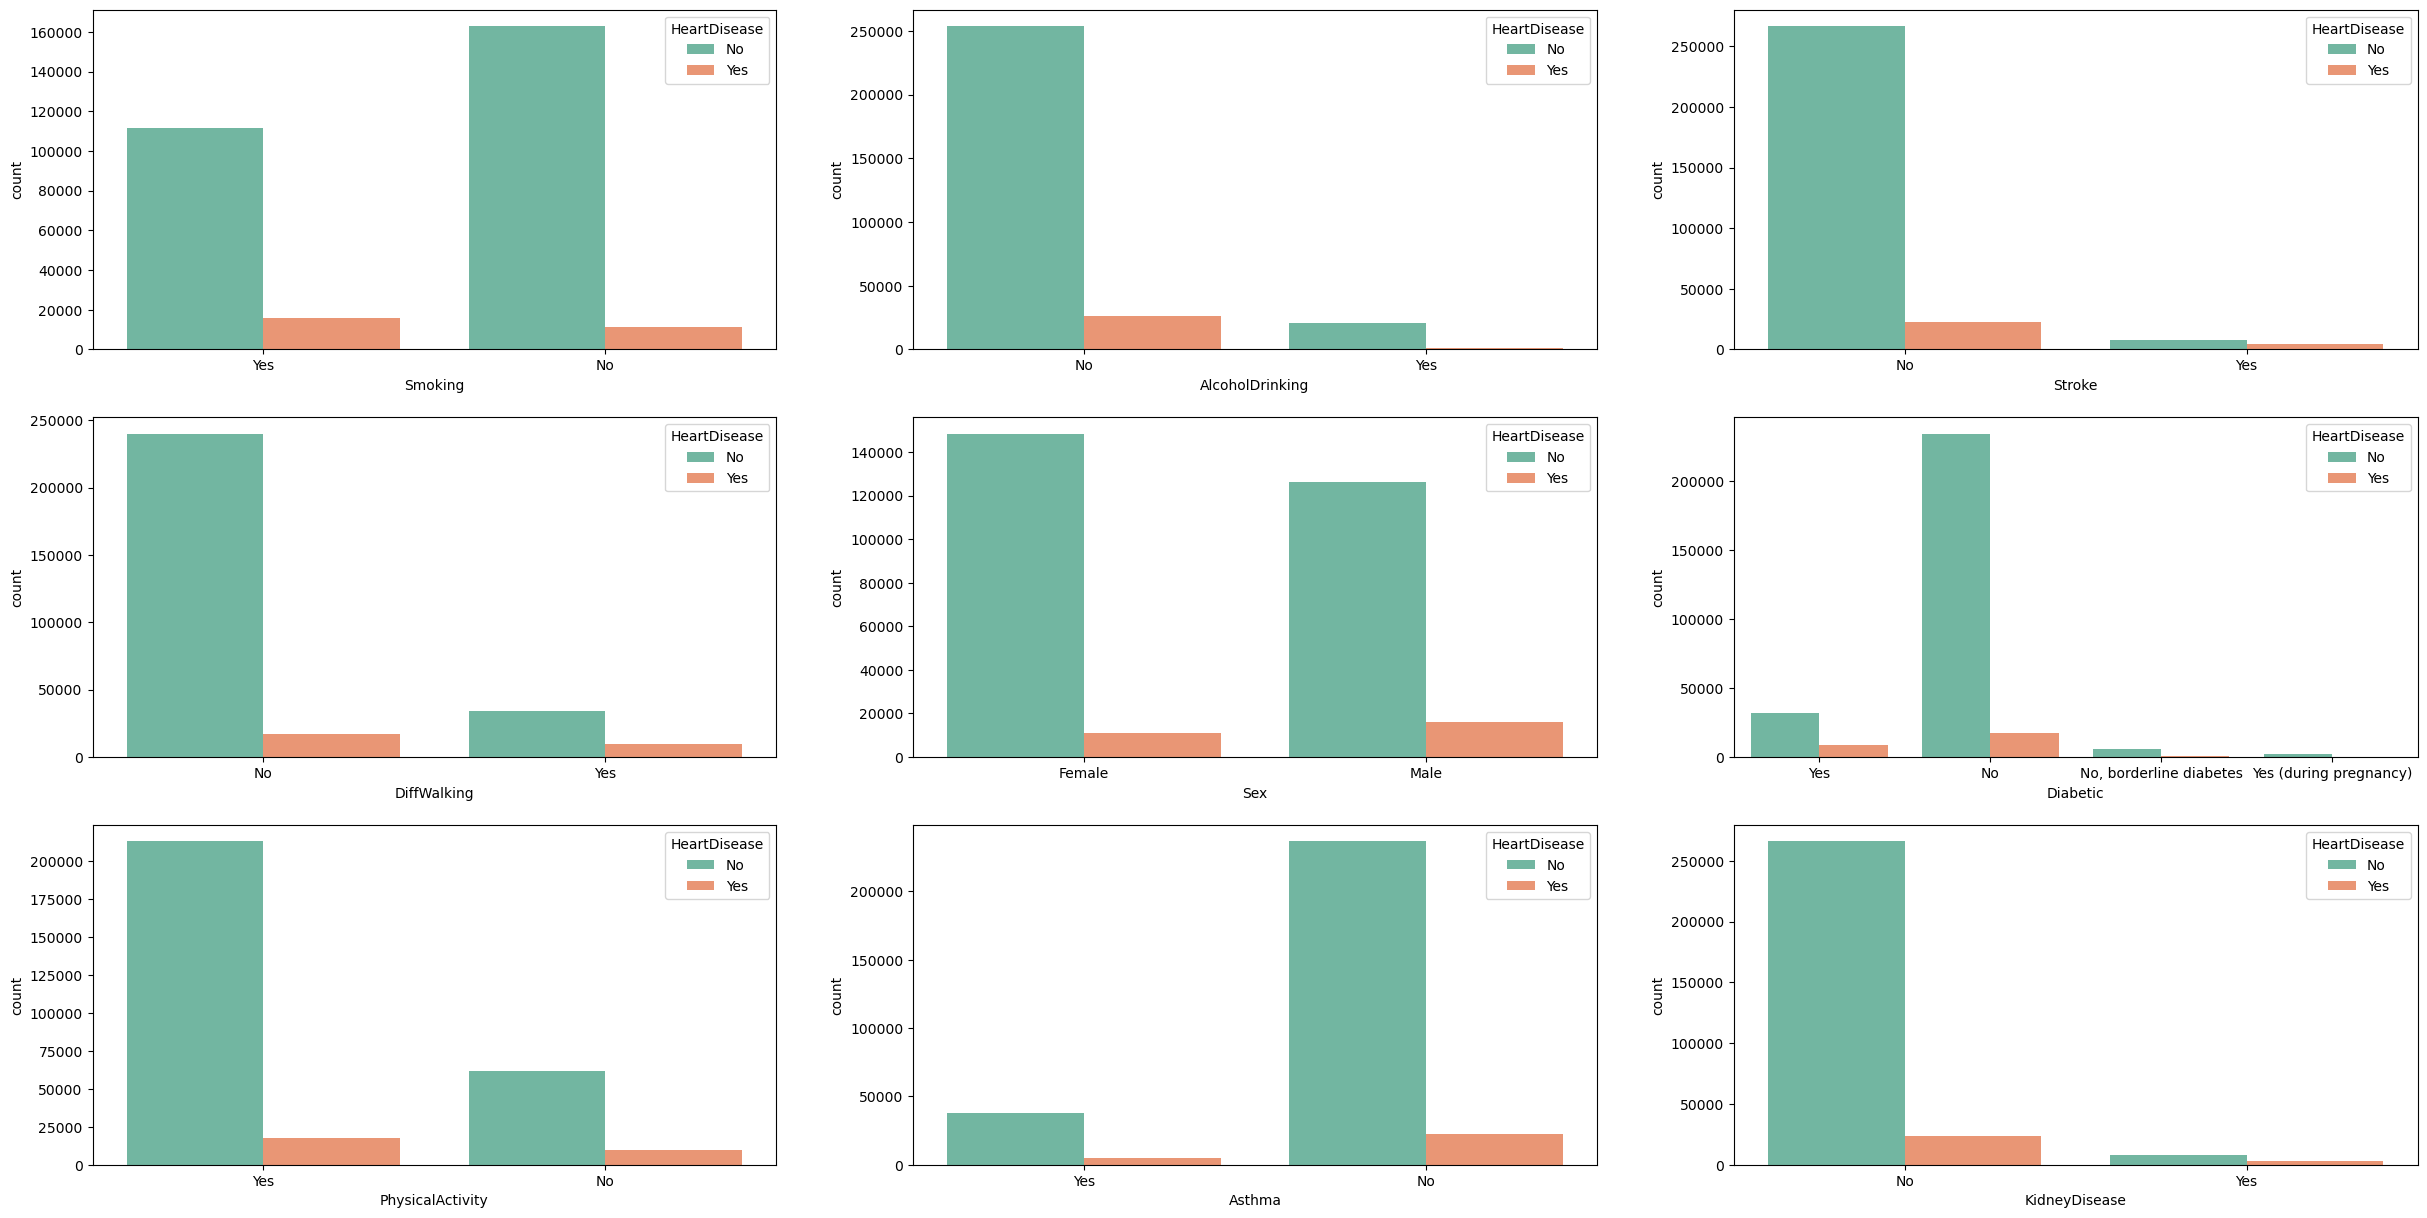

In [13]:
# Count column plots to map the dependence of 'Heart Disease' column on categorical features

fig, ax = plt.subplots(3, 3, figsize=(30, 15))

sns.countplot(x='Smoking', hue='HeartDisease', data=data, palette='Set2', ax=ax[0][0])
sns.countplot(x='AlcoholDrinking', hue='HeartDisease', data=data, palette='Set2', ax=ax[0][1])
sns.countplot(x='Stroke', hue='HeartDisease', data=data, palette='Set2', ax=ax[0][2])
sns.countplot(x='DiffWalking', hue='HeartDisease', data=data, palette='Set2', ax=ax[1][0])
sns.countplot(x='Sex', hue='HeartDisease', data=data, palette='Set2', ax=ax[1][1])
sns.countplot(x='Diabetic', hue='HeartDisease', data=data, palette='Set2', ax=ax[1][2])
sns.countplot(x='PhysicalActivity', hue='HeartDisease', data=data, palette='Set2', ax=ax[2][0])
sns.countplot(x='Asthma', hue='HeartDisease', data=data, palette='Set2', ax=ax[2][1])
sns.countplot(x='KidneyDisease', hue='HeartDisease', data=data, palette='Set2', ax=ax[2][2])

plt.show()

# FEATURE ENGINEERING

In [15]:
# Handling AgeCategory column
Age = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: Age[x])

In [17]:
# Converting string into integer
data['AgeCategory'] = data['AgeCategory'].astype('int')

In [18]:
data.rename(columns = {'AgeCategory':'Age'}, inplace = True)

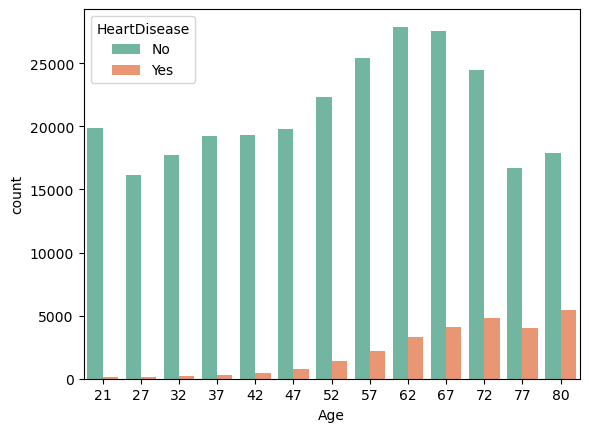

In [19]:
sns.countplot(x='Age', hue='HeartDisease', data=data, palette='Set2')
plt.show()

# **Outlier Detection**

In [20]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,Age,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,54.325964,7.084559
std,6.468134,8.140656,8.128288,17.814606,1.467122
min,12.020000,0.000000,0.000000,21.000000,1.000000
25%,24.030000,0.000000,0.000000,42.000000,6.000000
50%,27.410000,0.000000,0.000000,57.000000,7.000000
75%,31.650000,2.000000,4.000000,67.000000,8.000000
max,94.850000,30.000000,30.000000,80.000000,24.000000


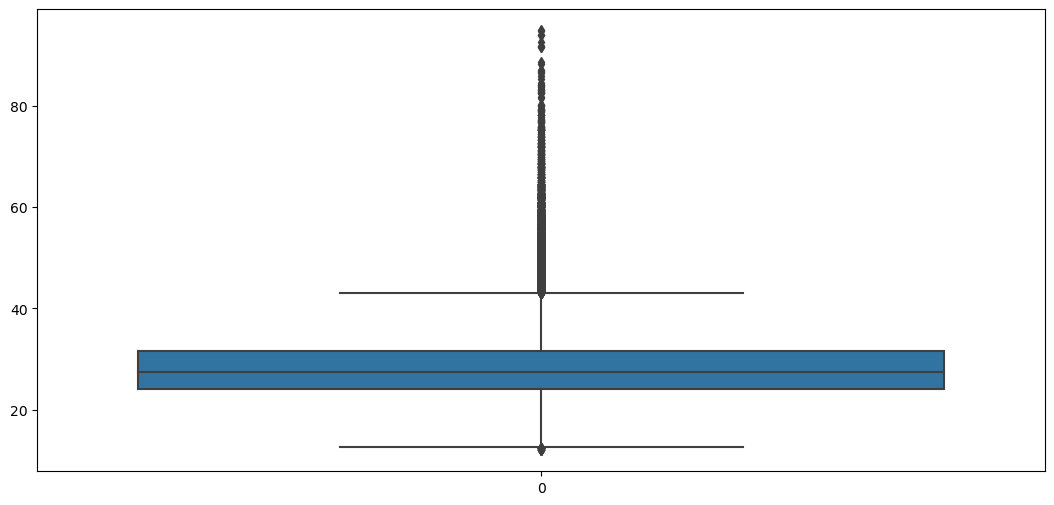

In [21]:
# Outlier Analysis before treatment
plt.figure(figsize=(13,6))
sns.boxplot(data['BMI'])
plt.show()

In [22]:
# Outlier treatment for BMI

Q1 = data.BMI.quantile(0.25)
Q3 = data.BMI.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.BMI >= Q1 - 1.5*IQR) & (data.BMI <= Q3 + 1.5*IQR)]

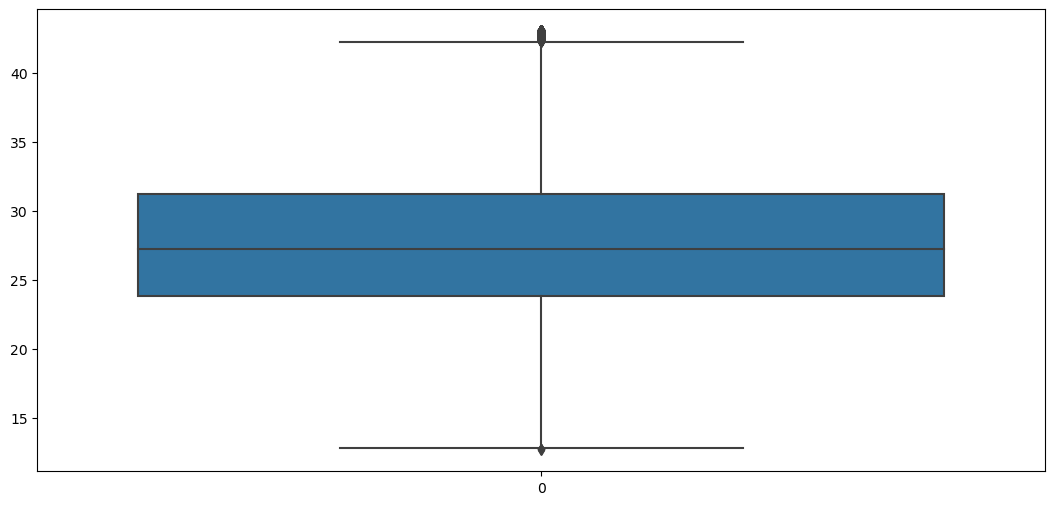

In [23]:
# Outlier Analysis after treatment
plt.figure(figsize=(13,6))
sns.boxplot(data['BMI'])
plt.show()

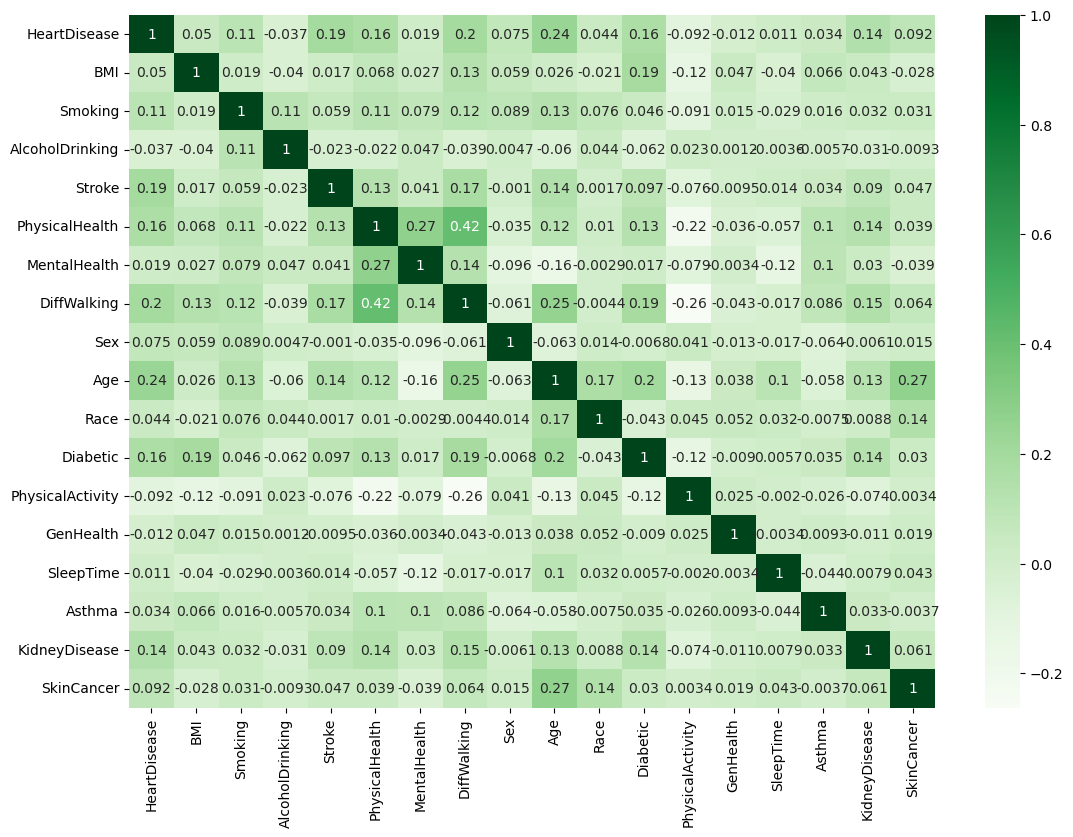

In [26]:
#Displaying Correlation between varaibles using heatmap

plt.figure(figsize=(13, 9))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()


# LABEL ENCODING 

In [25]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
objList = data.select_dtypes(include = "object").columns
#Converting all categorical variable to numerical values
for feat in objList:
    data[feat] = le.fit_transform(data[feat])

In [25]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Age,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,57,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,67,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,77,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,42,5,0,1,4,8.0,0,0,0


In [27]:
X = data.drop('HeartDisease', axis = 1)
y = data.HeartDisease

# TRAINING THE MODEL

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
# Making Prediction

y_pred_dt = dt.predict(X_test)

In [31]:
from sklearn.metrics import f1_score , roc_auc_score, accuracy_score
from sklearn.metrics import classification_report

In [32]:
# Evaluation

print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt))
print("F1-Score: ", f1_score(y_test, y_pred_dt))
print("AUC-Score: ", roc_auc_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy Score:  0.8538721090665683
F1-Score:  0.23126122888968742
AUC-Score:  0.5801262729332513
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     66693
           1       0.22      0.25      0.23      6510

    accuracy                           0.85     73203
   macro avg       0.57      0.58      0.58     73203
weighted avg       0.86      0.85      0.86     73203



In [33]:



from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
X_sm, y_sm = sm.fit_resample(X, y)

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.25, random_state = 42)

In [35]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
# Making Prediction

y_pred_dt = dt.predict(X_test)

In [37]:
# Evaluation

print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt))
print("F1-Score: ", f1_score(y_test, y_pred_dt))
print("AUC-Score: ", roc_auc_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy Score:  0.8662634963271982
F1-Score:  0.8681851797071439
AUC-Score:  0.8662417038289242
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     66528
           1       0.86      0.88      0.87     66749

    accuracy                           0.87    133277
   macro avg       0.87      0.87      0.87    133277
weighted avg       0.87      0.87      0.87    133277



In [38]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb = XGBClassifier(n_estimators= 100, max_depth= 3, learning_rate= 0.3)

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Evaluation

print("Accuracy Score: ", accuracy_score(y_test, y_pred_xgb))
print("F1-Score: ", f1_score(y_test, y_pred_xgb))
print("AUC-Score: ", roc_auc_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Accuracy Score:  0.8525927204243793
F1-Score:  0.8523301262778111
AUC-Score:  0.8525980134501423
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     66528
           1       0.86      0.85      0.85     66749

    accuracy                           0.85    133277
   macro avg       0.85      0.85      0.85    133277
weighted avg       0.85      0.85      0.85    133277



In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
randomforest = RandomForestClassifier()

In [ ]:
randomforest.fit(X_train,y_train)

In [ ]:
y_pred_rm = randomforest.predict(X_test)

In [ ]:
# Evaluation

print("Accuracy Score: ", accuracy_score(y_test, y_pred_rm))
print("F1-Score: ", f1_score(y_test, y_pred_rm))
print("AUC-Score: ", roc_auc_score(y_test, y_pred_rm))
print(classification_report(y_test, y_pred_rm))

Accuracy Score:  0.9018285225507777
F1-Score:  0.9033663717337035
AUC-Score:  0.9018046132038476
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     66528
           1       0.89      0.92      0.90     66749

    accuracy                           0.90    133277
   macro avg       0.90      0.90      0.90    133277
weighted avg       0.90      0.90      0.90    133277



### RANDOM FOREST HAS THE HIGHEST ACCURACY, F1-SCORE, AUC SCORE COMPARED TO OTHER MODELS

#### Accuracy Score:  0.9018285225507777
#### F1-Score:  0.9033663717337035
#### AUC-Score:  0.9018046132038476

In [ ]:
# saving the model
import pickle
pickle_out = open("Heart Disease Prediction Model.pkl", mode = "wb")
pickle.dump(randomforest, pickle_out)
pickle_out.close()